In [1]:
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler
from diffusers.utils import load_image

pipeline = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    cache_dir="/vol/paramonos2/projects/antoni/.cache",
).to("cuda")
pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)
pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="models", weight_name="ip-adapter-full-face_sd15.bin")

pipeline.set_ip_adapter_scale(1.0)

/vol/paramonos2/projects/antoni/miniconda3/envs/svd/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  4.17it/s]
/vol/paramonos2/projects/antoni/miniconda3/envs/svd/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [14]:
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler
from diffusers.utils import load_image

pipeline_2_1 = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-base",
    torch_dtype=torch.float16,
    cache_dir="/vol/paramonos2/projects/antoni/.cache",
).to("cuda")
# pipeline.unet

Loading pipeline components...: 100%|██████████| 6/6 [00:01<00:00,  5.72it/s]


In [15]:
pipeline_1_5 = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    cache_dir="/vol/paramonos2/projects/antoni/.cache",
).to("cuda")

Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  4.64it/s]


In [23]:
pipeline_1_5.vae.__dict__

{'_internal_dict': FrozenDict([('in_channels', 3),
             ('out_channels', 3),
             ('down_block_types',
              ['DownEncoderBlock2D',
               'DownEncoderBlock2D',
               'DownEncoderBlock2D',
               'DownEncoderBlock2D']),
             ('up_block_types',
              ['UpDecoderBlock2D',
               'UpDecoderBlock2D',
               'UpDecoderBlock2D',
               'UpDecoderBlock2D']),
             ('block_out_channels', [128, 256, 512, 512]),
             ('layers_per_block', 2),
             ('act_fn', 'silu'),
             ('latent_channels', 4),
             ('norm_num_groups', 32),
             ('sample_size', 512),
             ('scaling_factor', 0.18215),
             ('latents_mean', None),
             ('latents_std', None),
             ('force_upcast', True),
             ('_use_default_values',
              ['latents_mean',
               'force_upcast',
               'scaling_factor',
               'latents_std']),
 

: 

In [ ]:
image = load_image("/vol/paramonos2/projects/antoni/code/Personal/Old/generating_laugh/bigata_antoni.png")
generator = torch.Generator(device="cpu").manual_seed(26)

image = pipeline(
    prompt="",
    ip_adapter_image=image,
    negative_prompt="",
    num_inference_steps=100,
    generator=generator,
).images[0]
image

In [2]:
import torch
from diffusers import AutoPipelineForText2Image, DDIMScheduler
from transformers import CLIPVisionModelWithProjection
from diffusers.utils import load_image

image_encoder = CLIPVisionModelWithProjection.from_pretrained(
    "h94/IP-Adapter",
    subfolder="models/image_encoder",
    torch_dtype=torch.float16,
    cache_dir="/vol/paramonos2/projects/antoni/.cache",
)

pipeline = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    image_encoder=image_encoder,
    cache_dir="/vol/paramonos2/projects/antoni/.cache",
)
pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)
pipeline.load_ip_adapter(
    "h94/IP-Adapter", subfolder="sdxl_models", weight_name=["ip-adapter-plus-face_sdxl_vit-h.safetensors"]
)
pipeline.set_ip_adapter_scale([0.7])
pipeline.enable_model_cpu_offload()

face_image = load_image("https://huggingface.co/datasets/YiYiXu/testing-images/resolve/main/women_input.png")
style_folder = "https://huggingface.co/datasets/YiYiXu/testing-images/resolve/main/style_ziggy"
style_images = [load_image(f"{style_folder}/img{i}.png") for i in range(10)]

Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]


100%|██████████| 50/50 [00:20<00:00,  2.42it/s]


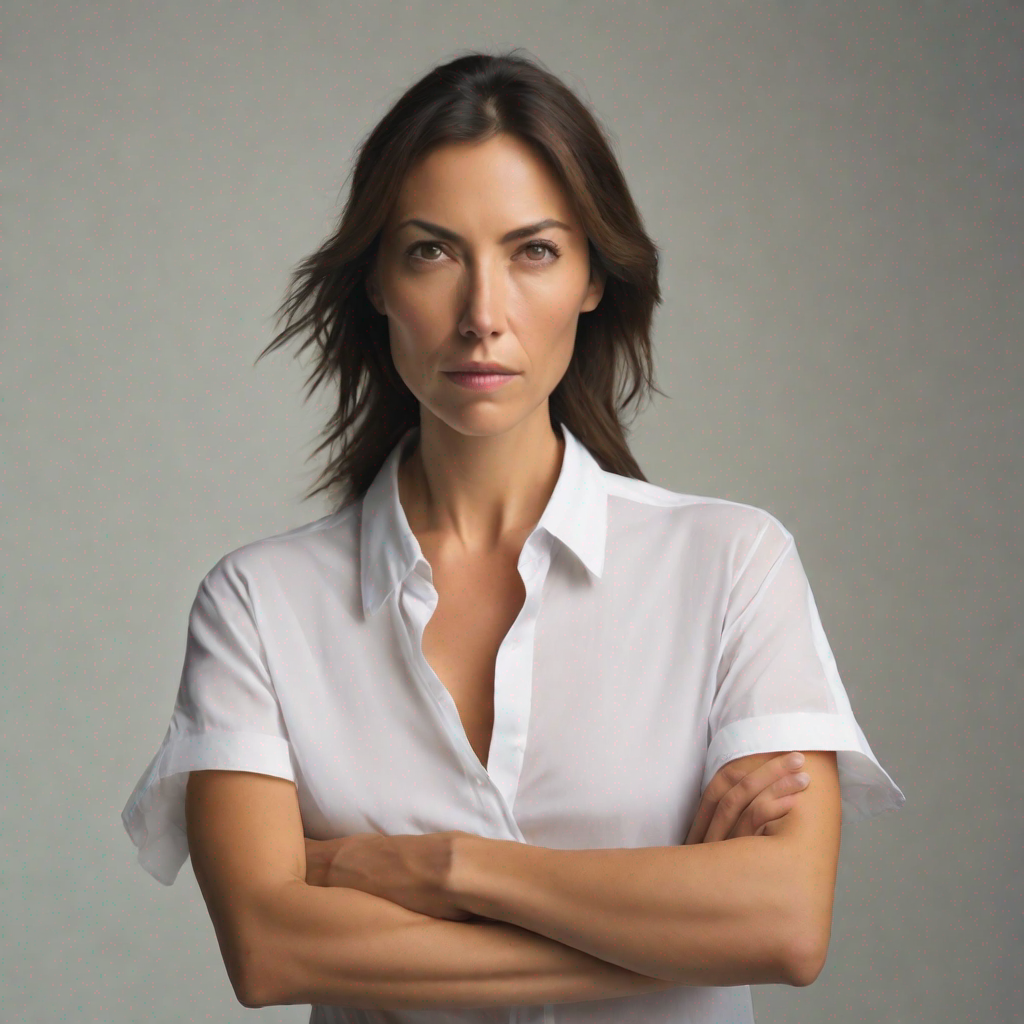

: 

In [4]:
generator = torch.Generator(device="cpu").manual_seed(0)

# Run on gpu 7
with torch.cuda.device(7):
    image = pipeline(
        prompt="",
        ip_adapter_image=[face_image],
        negative_prompt="",
        num_inference_steps=50,
        num_images_per_prompt=1,
        generator=generator,
    ).images[0]
image